In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

Dimensions de l'entrée (X) : (1000, 2)
Dimensions de la sortie (y) : (1000,)


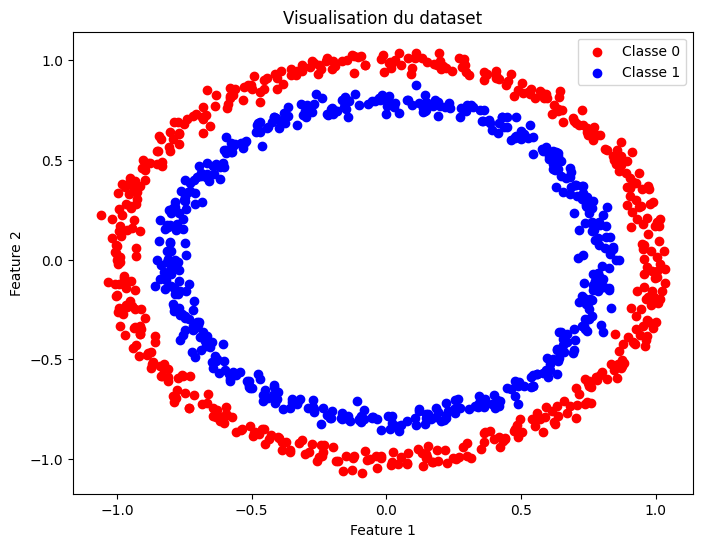

In [2]:
# 1. Création du dataset avec make circles()
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

# 2. Affichage des dimensions du dataset
print("Dimensions de l'entrée (X) :", X.shape)
print("Dimensions de la sortie (y) :", y.shape)

# 3. Visualisation des données
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Classe 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Classe 1')
plt.title("Visualisation du dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

==> En regardant la visualisation, on peut voir que les classes ne peuvent pas être séparées linéairement. Une fonction non linéaire sera nécessaire pour séparer ces classes.

In [3]:
# 5. Division des données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensions de X_train :", X_train.shape)
print("Dimensions de X_test :", X_test.shape)
print("Dimensions de y_train :", y_train.shape)
print("Dimensions de y_test :", y_test.shape)

Dimensions de X_train : (800, 2)
Dimensions de X_test : (200, 2)
Dimensions de y_train : (800,)
Dimensions de y_test : (200,)
